In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
%matplotlib inline
plt.rc('axes', labelsize=18)
plt.rc('font', size=12)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=12)  # fontsize of the figure title

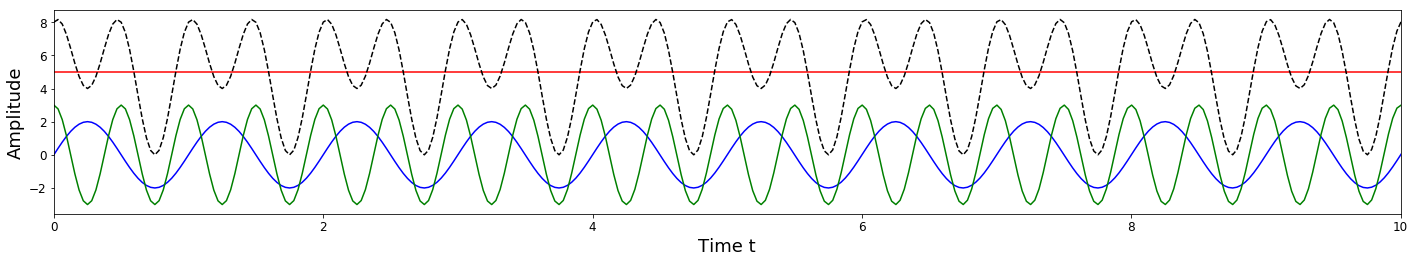

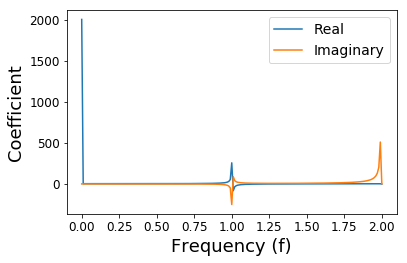

In [35]:
#==================== SELECTED TOPIC: DFT ===================================

t = np.linspace(0,100,3200)
a = np.full_like(t, 5.)
b = 2*np.cos(2*np.pi*t - np.pi/2)
c = 3*np.cos(4*np.pi*t)
f = a + b + c

plt.figure(0, figsize=(20,4))
plt.plot(t, a, '-r', t, b, '-b', t, c, '-g', t, f, '--k')
plt.xlim(0,10)
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig('3 functions.png')

#===================== DFT PLOTS ==============================================
#using poor spacing

t = np.linspace(0, 100, 400)
f = 5. + 2*np.cos(2*np.pi*t - np.pi/2) + 3*np.cos(4*np.pi*t)

N = f.size
f_fft = np.fft.rfft(f)
freq = np.fft.rfftfreq(N)
df = 1. / (t[399] - t[0])

plt.figure(2)
plt.plot(freq*df*N, f_fft.real, label='Real')
plt.plot(freq*df*N, f_fft.imag, label='Imaginary')
plt.xlabel('Frequency (f)')
plt.ylabel('Coefficient')
plt.legend()
plt.tight_layout()
plt.savefig('Coefficients')

[ 5127381.51493347  5419341.25643411  6078309.47153764]


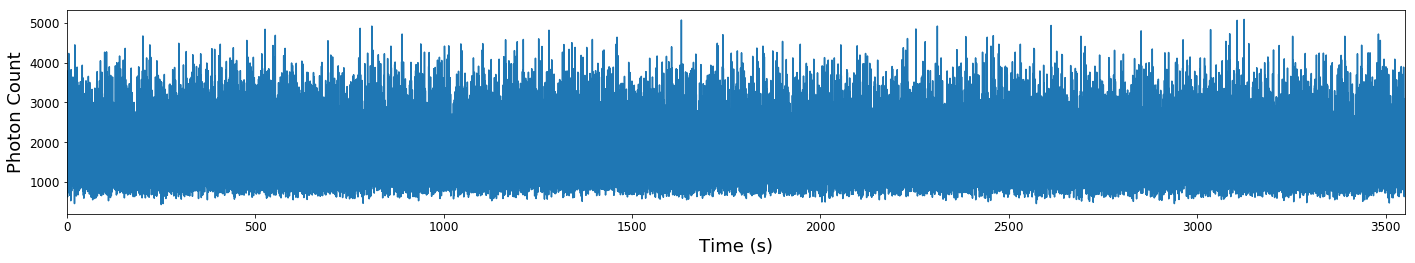

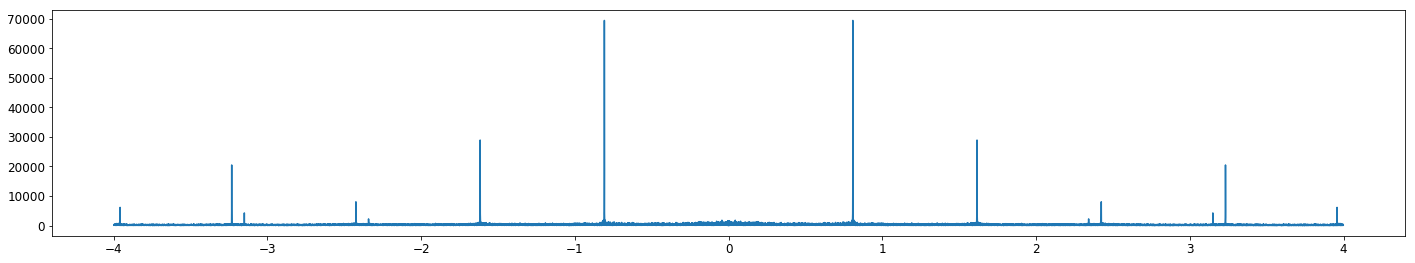

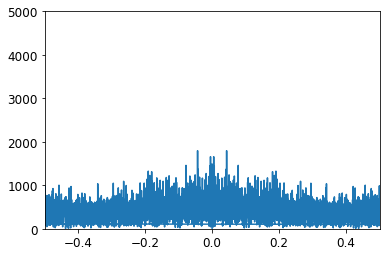

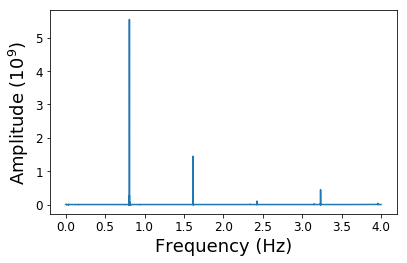

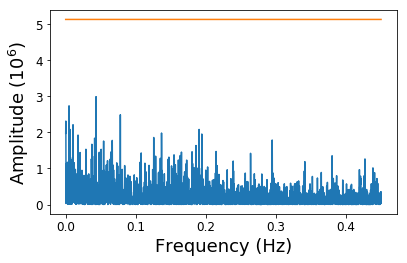

In [5]:
#==================== APPLICATION: BINARY STARS =============================

file = open('phys581-binary.txt', 'r')

t = []
count = []

for indx in range(0,28400):
    line = file.readline()
    line = line[:-1]
    t.append(float(line[:11]))
    count.append(float(line[11:]))
    
plt.figure(0, figsize=(20,4))
plt.plot(t, count)
plt.xlim(0,3551)
plt.xlabel('Time (s)')
plt.ylabel('Photon Count')
plt.tight_layout()
plt.savefig('binary_time.png')

#=================== PART B ==================================================
count = np.asarray(count)
t     = np.asarray(t)

c_fft = np.fft.fft(count, norm='ortho')
c_fftfreq = np.fft.fftfreq(t.size)
c_fft[0] = 0
T = t[28399] - t[0]
df = 1. / T
N = t.size

plt.figure(1, figsize=(20,4))
plt.plot(c_fftfreq*df*N, np.abs(c_fft))
plt.tight_layout()


plt.figure(2)
plt.plot(c_fftfreq*df*N, np.abs(c_fft))
plt.xlim(-0.5, 0.5)
plt.ylim(0,5000)


#Testing this against Lomb-Scargle

ls = LombScargle(t, count)
frequency, power = ls.autopower(nyquist_factor=8, maximum_frequency=4, normalization='psd', method='chi2')

#Let's also determine the false-alarm probability levels, and plot them
p_levels = [0.1, 0.05, 0.01]
sig = power.max() * ls.false_alarm_level(p_levels, nyquist_factor=500, maximum_frequency=4)
print(sig)
p_levels_plots = np.zeros((3, power.size))
for i in range(3):
    p_levels_plots[i,:] = sig[i]

plt.figure(3)
plt.plot(frequency, power/(10**9))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude $(10^9)$')
plt.tight_layout()
plt.savefig('BinarySpectrum.png')

plt.figure(4)
plt.plot(frequency[:8000], power[:8000]/(10**6))
plt.plot(frequency[:8000], p_levels_plots[0,:8000]/(10**6))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude $(10^6)$')
plt.tight_layout()
plt.savefig('binaryZoom.png')

#Well, none of the peaks in this region are significant. But what is the significance of the best peak in this region?

#ls2 = LombScargle(t, count)
#freq_norm , power_norm = ls.autopower(nyquist_factor=500, maximum_frequency=4)
#power_norm = power_norm[:8000]

#best = ls.false_alarm_probability(np.amax(power_norm))
#print(best)

130.875


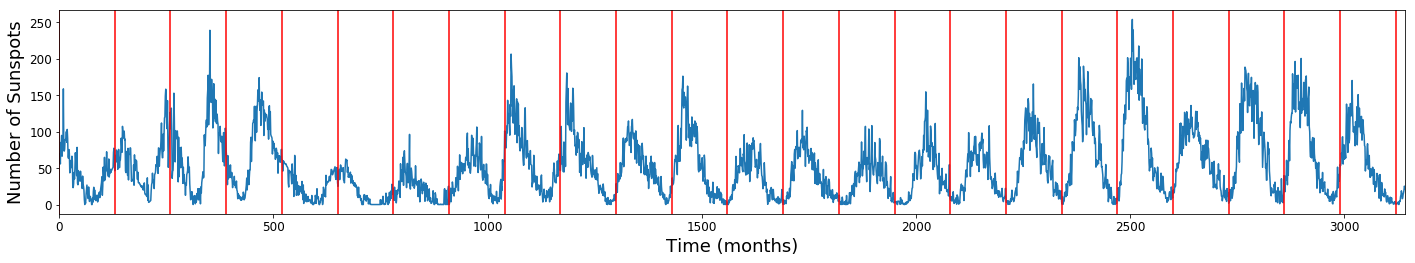

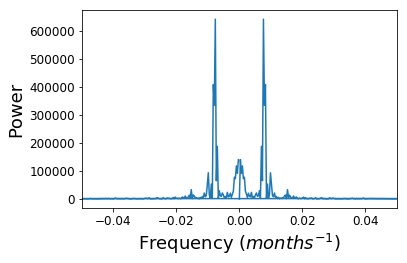

In [37]:
#=============================APPLICATION: SUNSPOTS ========================

file = open('phys581-sunspots.txt', 'r')

t = []
count = []

for indx in range(0,3143):
    line = file.readline()
    parts = line[:-1].split('\t')
    t.append(int(parts[0]))
    count.append(float(parts[1]))
    
plt.figure(0, figsize=(20,4))
plt.plot(t, count)
i=0.
while i < t[3141]:
    plt.axvline(i, color='r')
    #i += 130.875
    i += 130
plt.xlabel('Time (months)')
plt.ylabel('Number of Sunspots')
plt.xlim(0, 3141)
plt.tight_layout()
plt.savefig('sunspot time')
#By eyeballing the graph, my best guess for 1 form of periodicity is approximately 80 months

#Padding is necessary, for a pure FFT at least. I will take advantage of the numpy FFT automatic padding

c_fft = np.fft.fft(count, norm='ortho')
c_freq = np.fft.fftfreq(len(t))
c_fft[0] = 0
T = t[3141] - t[0]
df = 1./T
N = len(count)

plt.figure(1)
plt.plot(c_freq*df*N, np.abs(c_fft**2))
plt.xlim(-0.05,0.05)
plt.xlabel('Frequency ($months^{-1}$)')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('SunSpotPowerSpectrum.png')

print(1./(c_freq[np.argmax(np.abs(c_fft**2))]*df*N))

#The resolution here isn't great, I'd prefer instead to use the lomb-scargle to test this

ls = LombScargle(t, count)
freq, power = ls.autopower(nyquist_factor=16)
plt.figure(2)
plt.

[  1.18400204e-01   3.08844202e+02]
[  8.28025829e-05  -5.08293263e-02   5.24247875e+00]


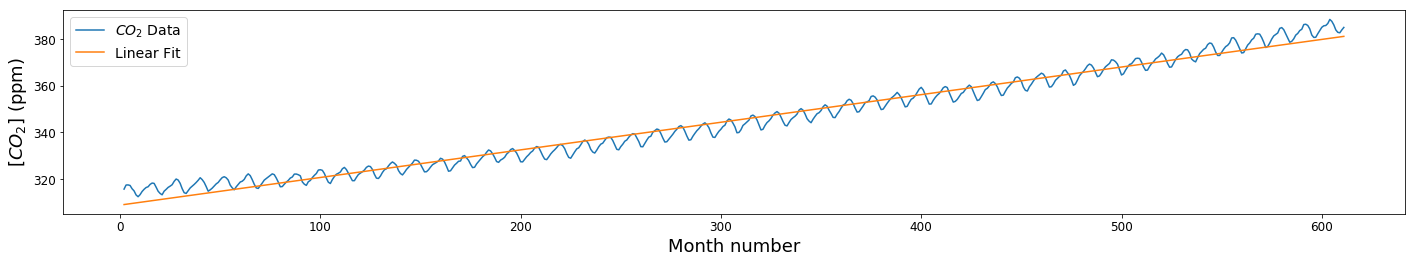

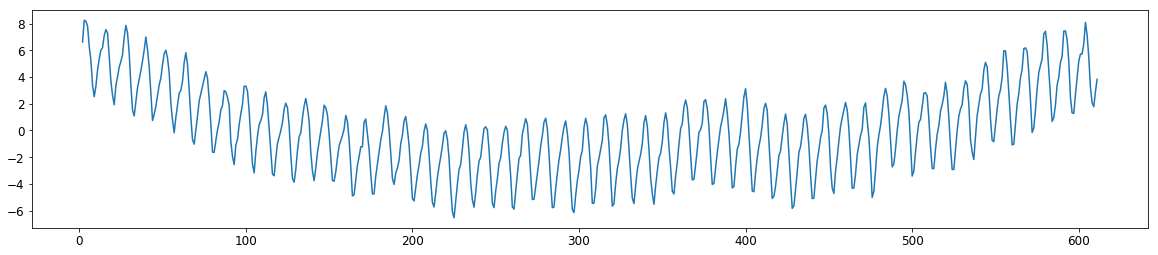

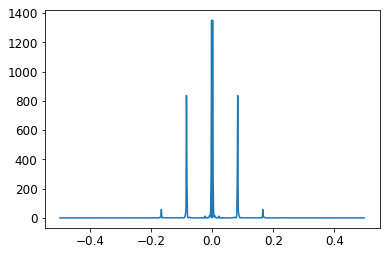

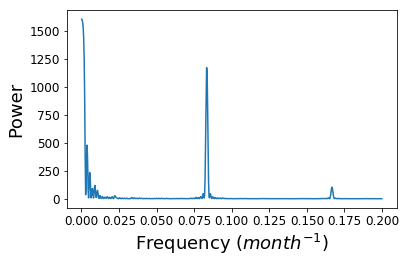

In [5]:
#=============================APPLICATION: CLIMATE ========================

file = open('phys581-co2.txt', 'r')

co2  = []
year = []
month = []
month_no = []

for i in range(4):
    line = file.readline()
    
i=0
for indx in range(0,51):
    line = file.readline()
    parts = line[:-2].split('\t')
    for j in range(1,13):
        co2.append(float(parts[j]))
        year.append(int(parts[0]))
        month.append(j)
        month_no.append(i)
        i+=1
j = 0
while j < len(co2):
    if co2[j] == -99.99:
        del co2[j]
        del year[j]
        del month[j]
        del month_no[j]
    else:
        j += 1

plt.figure(0, figsize=(20,4))
plt.plot(month_no, co2, label='$CO_2$ Data')
plt.xlabel('Month number')
plt.ylabel('$[CO_2]$ (ppm)')

p = np.polyfit(month_no, co2, 1)
month_no = np.asarray(month_no)

plt.plot(month_no, p[0]*month_no + p[1], label='Linear Fit')
plt.legend()
plt.tight_layout()
plt.savefig('co2trend.png')
print(p)

co2 = np.asarray(co2)
co2 -= p[0]*month_no + p[1]

plt.figure(1, figsize=(20,4))
plt.plot(month_no, co2)

N = month_no.size
co2_fft = np.fft.fft(co2, norm='ortho')
month_freq = np.fft.fftfreq(N)
T = np.amax(month_no) - month_no[0]
df = 1. / T
month_freq = np.concatenate((month_freq[304:], month_freq[:304]),axis=0)
co2_fft = np.concatenate((co2_fft[304:], co2_fft[:304]),axis=0)

plt.figure(2)
plt.plot(month_freq*df*N, np.abs(co2_fft**2))

#Using the Lomb-Scargle Method
ls = LombScargle(month_no, co2)
frequency, power = ls.autopower(nyquist_factor=32, maximum_frequency=0.2, normalization='psd')

plt.figure(4)
plt.plot(frequency, power)
plt.xlabel('Frequency ($month^{-1}$)')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('co2power.png')

#for i in range(month_freq.size):
#    print(month_freq[i], np.abs(co2_fft[i]**2))

#Toxicity occurs at 100,000 ppm max. This will happen in 841000 months or 70166years aka 72,123 AD.

#Is the warming accellerating? We assumed linear - so no. Let's move our assumption up one level then to quadratic

p = np.polyfit(month_no, co2, 2)
print(p)

# [CO2] = 5.25ppm -0.0583m + 0.0000828m^2   ========> Therefore it is accellerating

In [44]:
print( 1./ 0.0840)

11.904761904761903


5112.55453369
6088.45630726
6142.16128108 6209.79828443


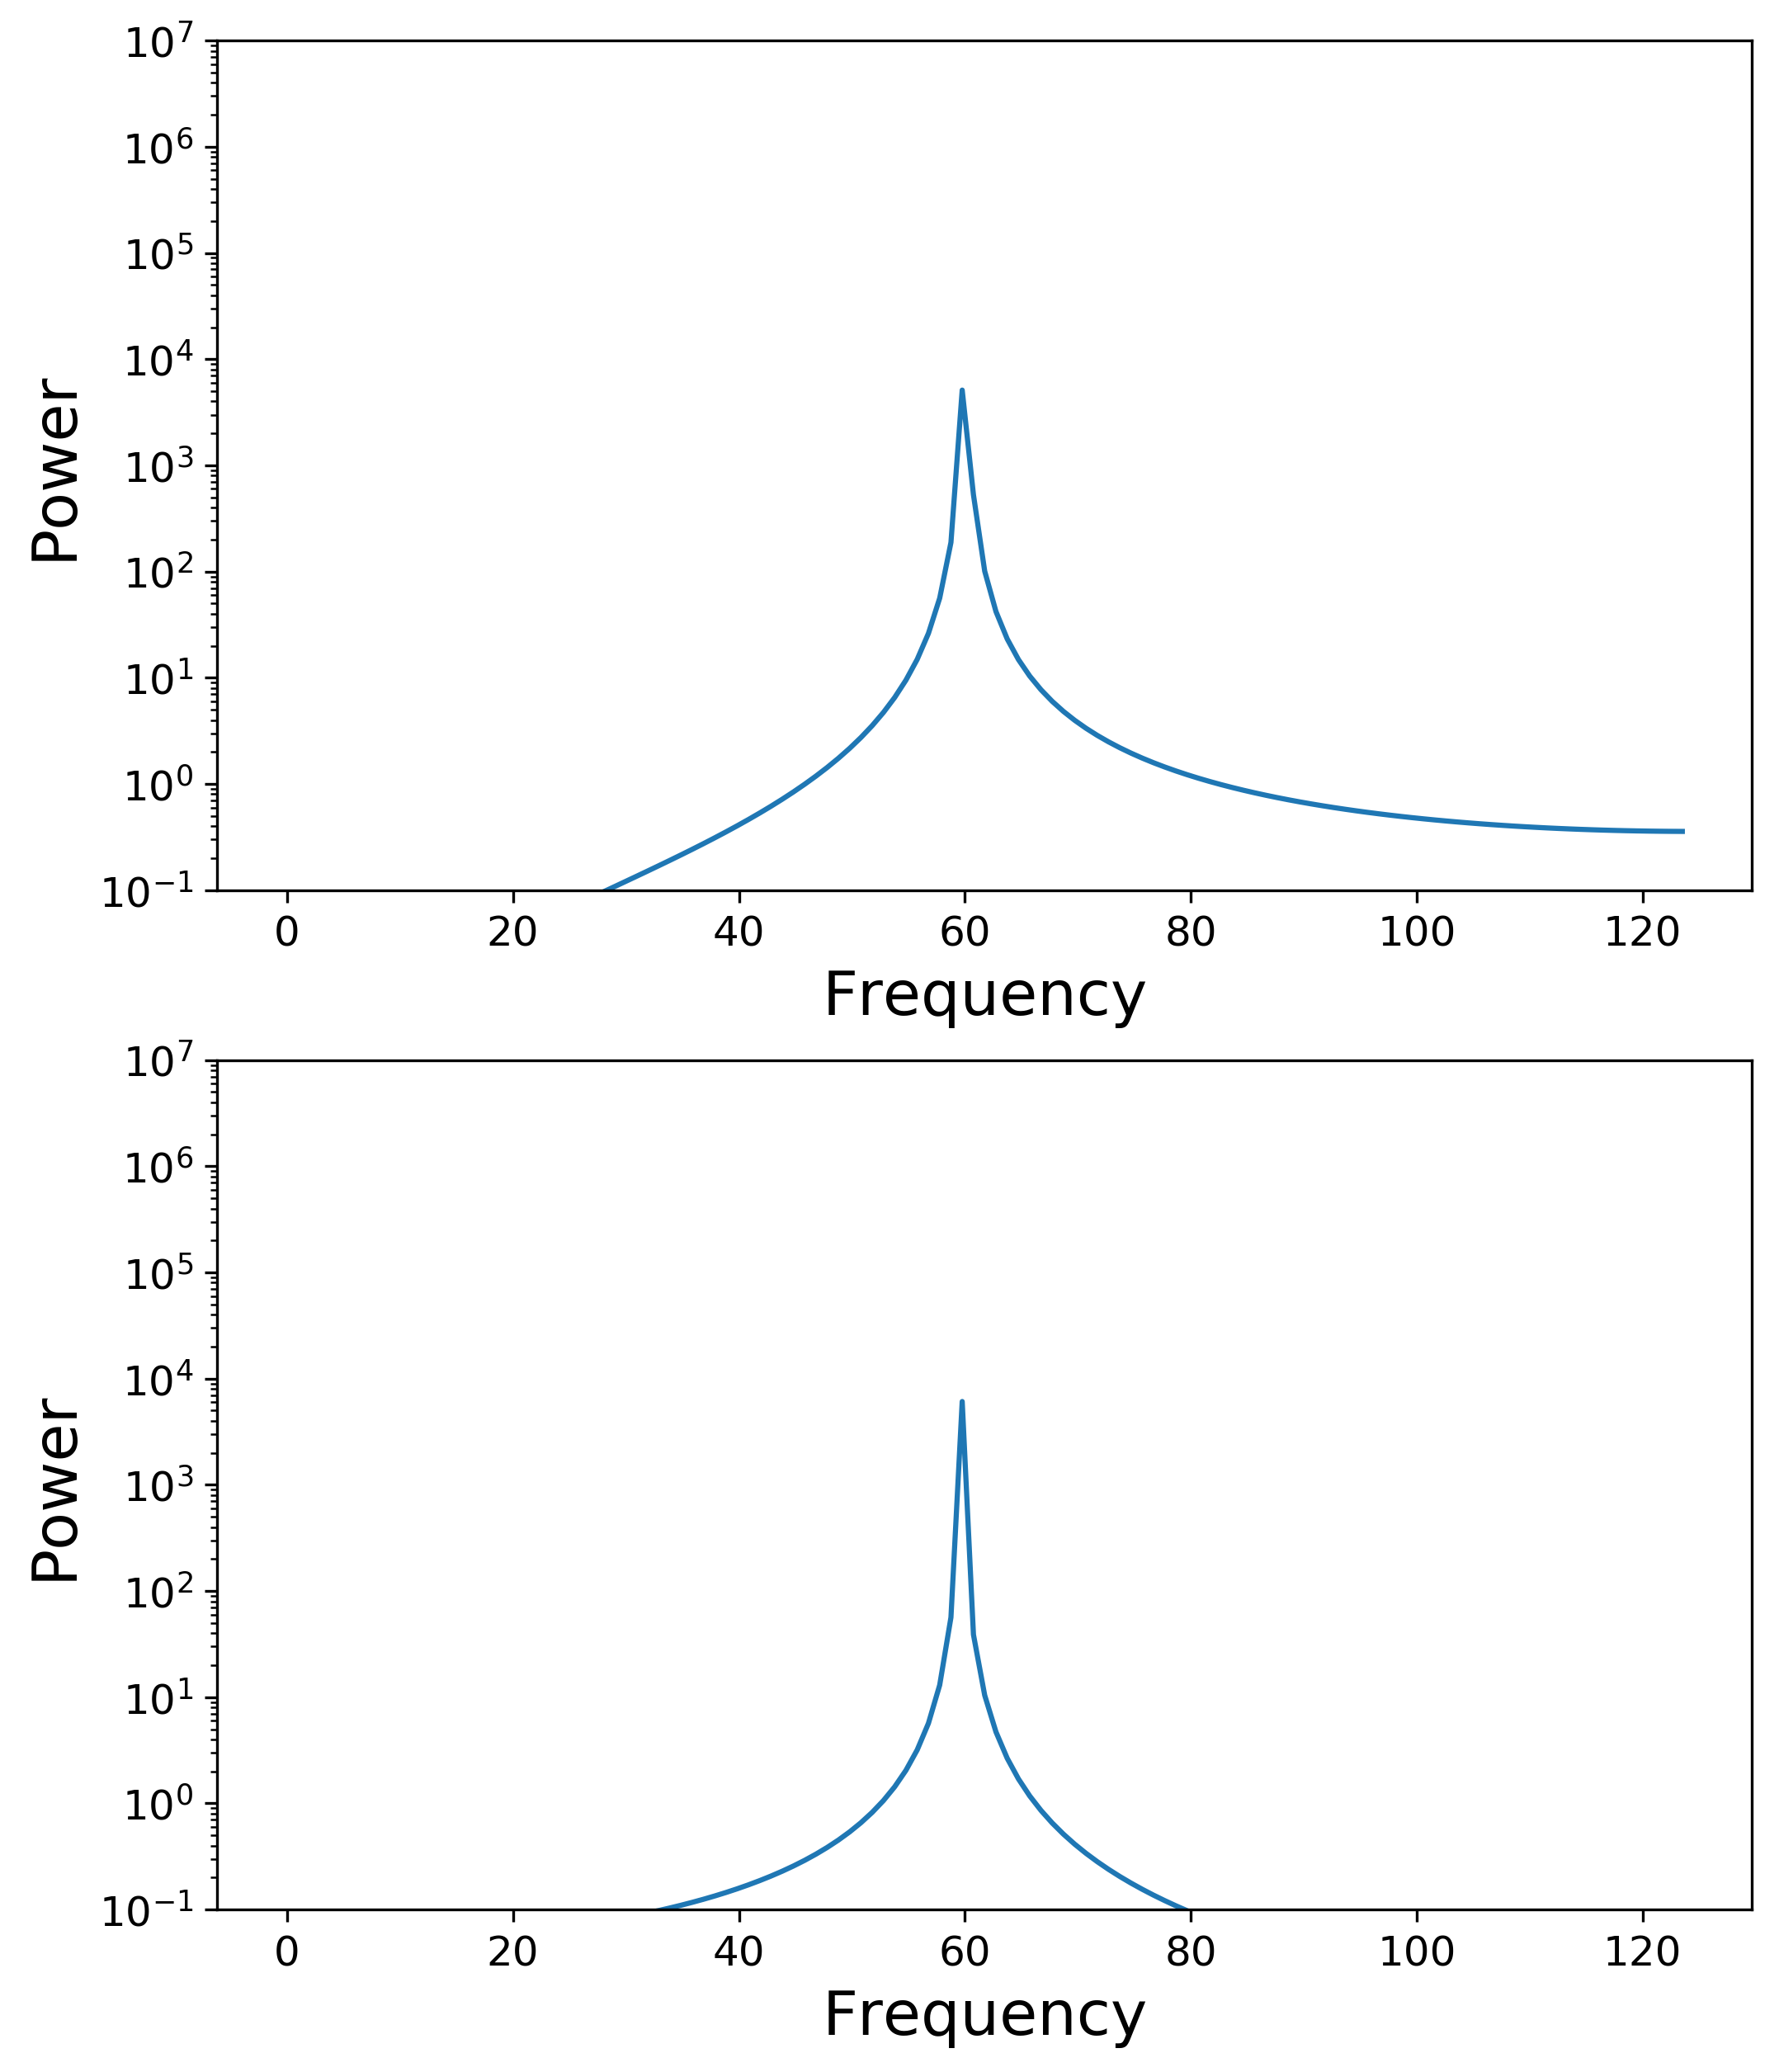

In [38]:
def power_spectrum(x):
    return np.abs(np.fft.fftshift(np.fft.fft(x, norm='ortho'))**2)


# 1.2: Power Spectrum and Filtering
# -----------------------------------
def wave(t, amp=1, freq=1, phase=0):
    return amp * np.sin(2 * np.pi * freq * t - phase)

def hann_window(size):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(0, size) / (size - 1)))

def blackmann_harris_window(size):
    t = 2 * np.pi * np.arange(0, size) / (size - 1)
    window = 0.35875 - 0.48829 * np.cos(t) + 0.14128 * np.cos(2 * t) \
             - 0.01168 * np.cos(3 * t)
    return window

# part a: proof
# - - - - - - - -
# The proof is in the report

# part b: first plot
# - - - - - - - - - -
t = np.linspace(0, 1, 250)
freq = np.fft.fftshift(np.fft.fftfreq(t.size, t[1] - t[0]))

samples_0 = wave(t, amp=10, freq=60)
power_0 = power_spectrum(samples_0)

plt.figure(1)
fig, subs = plt.subplots(nrows=2, figsize=(8, 10), dpi=300)

#subs[0].set_title('Power Spectrum of Sine at $60$Hz')
subs[0].set_xlabel('Frequency')
subs[0].set_ylabel('Power')
subs[0].set_ylim(10**-1, 10**7)
subs[0].set_yscale('log')
subs[0].plot(freq[125:], power_0[125:])

# part c: second plot
# - - - - - - - - - - -
samples_1 = wave(t, amp=10, freq=59.673)
power_1 = power_spectrum(samples_1)

#subs[1].set_title('Power Spectrum of Sine at $59.673$Hz')
subs[1].set_xlabel('Frequency')
subs[1].set_ylabel('Power')
subs[1].set_ylim(10**-1, 10**7)
subs[1].set_yscale('log')
subs[1].plot(freq[125:], power_1[125:])

plt.savefig('power_spectrum')

print(np.amax(power_0))
print(np.amax(power_1))

power_sum0 = 0
power_sum1 = 0
df = freq[1] - freq[0]
for i in range(176,196):
    power_sum0 += power_0[i]*df
    power_sum1 += power_1[i]*df
print(power_sum0, power_sum1)